<a href="https://colab.research.google.com/github/DajeanArcila/DajeanArcila/blob/main/Quality_wine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt



In [2]:
# Cargar el dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url, sep=';')

In [3]:
# Exploración de datos
print(data.head())




   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
print(data.describe())

       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

In [6]:
# Preprocesamiento
# Verificar valores nulos
#print(data.isnull().sum())

In [7]:
# Convertir la calidad en una variable categórica
data['quality'] = data['quality'].astype('category')


In [8]:
# Dividir el dataset en características (X) y la variable objetivo (y)
X = data.drop('quality', axis=1)
y = data['quality']

In [9]:
# Dividir el dataset en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Entrenar el modelo de árbol de decisión
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [11]:
# Realizar predicciones
y_pred = model.predict(X_test)

In [12]:

# Evaluar el modelo
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[ 0  0  0  1  0  0]
 [ 0  0  5  5  0  0]
 [ 1  4 88 35  2  0]
 [ 0  3 40 70 17  2]
 [ 0  1  5 14 21  1]
 [ 0  0  1  3  1  0]]

Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.63      0.68      0.65       130
           6       0.55      0.53      0.54       132
           7       0.51      0.50      0.51        42
           8       0.00      0.00      0.00         5

    accuracy                           0.56       320
   macro avg       0.28      0.28      0.28       320
weighted avg       0.55      0.56      0.55       320



In [13]:
# Visualizar la importancia de las características
feature_importances = model.feature_importances_
features = X.columns
indices = feature_importances.argsort()[::-1]

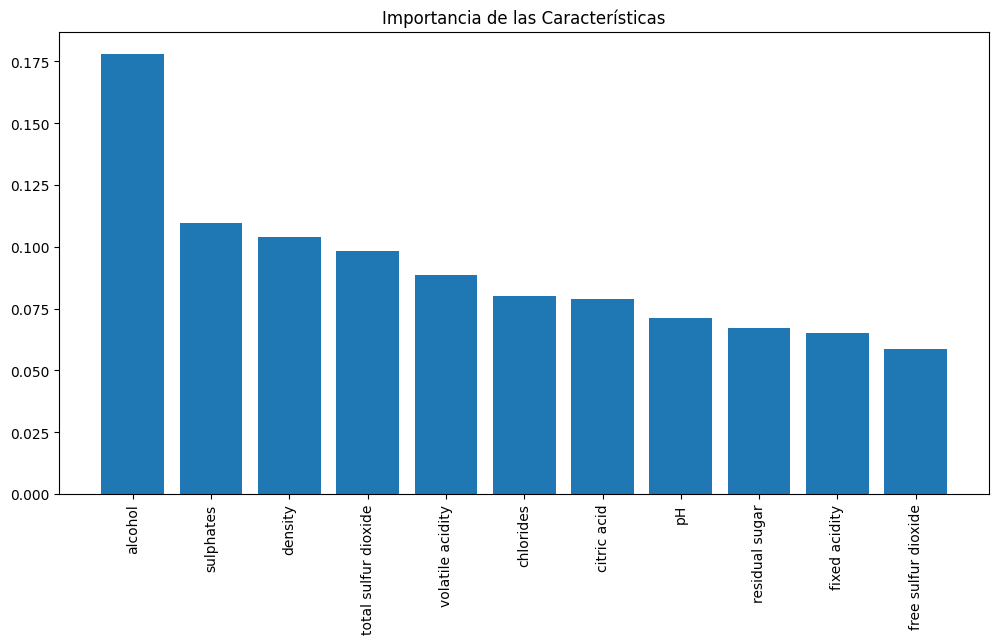

In [21]:
# Visualizar la importancia de las características
def plot_feature_importances(model, features):
    feature_importances = model.feature_importances_
    indices = feature_importances.argsort()[::-1]

    plt.figure(figsize=(12, 6))
    plt.title("Importancia de las Características")
    plt.bar(range(len(features)), feature_importances[indices], align="center")
    plt.xticks(range(len(features)), features[indices], rotation=90)
    plt.show()

plot_feature_importances(model, X.columns)

In [17]:
# Función para predecir la calidad de nuevos datos desde un archivo
def predict_wine_quality_from_file(file_path, model, file_type='csv'):
    """
    Predice la calidad del vino basado en el modelo entrenado a partir de un archivo CSV o Excel.

    Args:
    file_path (str): Ruta del archivo CSV o Excel con los nuevos datos.
    model (DecisionTreeClassifier): El modelo entrenado.
    file_type (str): Tipo de archivo ('csv' o 'excel').

    Returns:
    DataFrame: Un DataFrame con las predicciones de calidad.
    """

    '''
    if file_type == 'csv':
        new_data = pd.read_csv(file_path)
    elif file_type == 'excel':
        new_data = pd.read_excel(file_path)
    else:
        raise ValueError("El tipo de archivo debe ser 'csv' o 'excel'")
        '''
    new_data= pd.read_csv('/content/new_wines.csv')
    predictions = model.predict(new_data)
    result = new_data.copy()
    result['Predicted_Quality'] = predictions
    return result

In [ ]:

# Ejemplo de uso de la función con un archivo CSV
# Guardar un ejemplo de archivo CSV para nuevos datos
#new_wines.to_csv('new_wines.csv', index=False)


In [18]:
# Obtener predicciones para los nuevos datos desde el archivo CSV
predictions_df = predict_wine_quality_from_file('new_wines.csv', model, file_type='csv')
print(predictions_df)

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            6.3              0.30         0.34             1.6      0.040   
2            7.8              0.88         0.00             2.6      0.098   
3            7.8              0.76         0.04             2.3      0.092   
4           11.2              0.28         0.56             1.9      0.075   
5            7.4              0.70         0.00             1.9      0.076   
6            6.3              0.30         0.34             1.6      0.040   
7            7.8              0.88         0.00             2.6      0.098   
8            7.8              0.76         0.04             2.3      0.092   
9           11.2              0.28         0.56             1.9      0.075   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0

In [19]:
# Guardar las predicciones en un nuevo archivo CSV
predictions_df.to_csv('predicted_wine_quality.csv', index=False)

In [16]:
#ejemplo para usar con nuestro codigo sin nuestra variable target
'''
import pandas as pd

# Crear el DataFrame
data = {
    'fixed acidity': [7.4, 6.3, 7.8, 7.8, 11.2, 7.4, 6.3, 7.8, 7.8, 11.2],
    'volatile acidity': [0.70, 0.30, 0.88, 0.76, 0.28, 0.70, 0.30, 0.88, 0.76, 0.28],
    'citric acid': [0.00, 0.34, 0.00, 0.04, 0.56, 0.00, 0.34, 0.00, 0.04, 0.56],
    'residual sugar': [1.9, 1.6, 2.6, 2.3, 1.9, 1.9, 1.6, 2.6, 2.3, 1.9],
    'chlorides': [0.076, 0.04, 0.098, 0.092, 0.075, 0.076, 0.04, 0.098, 0.092, 0.075],
    'free sulfur dioxide': [11.0, 17.0, 25.0, 15.0, 17.0, 11.0, 17.0, 25.0, 15.0, 17.0],
    'total sulfur dioxide': [34.0, 60.0, 67.0, 54.0, 60.0, 34.0, 60.0, 67.0, 54.0, 60.0],
    'density': [0.9978, 0.9920, 0.9968, 0.9970, 0.9980, 0.9978, 0.9920, 0.9968, 0.9970, 0.9980],
    'pH': [3.51, 3.30, 3.20, 3.26, 3.16, 3.51, 3.30, 3.20, 3.26, 3.16],
    'sulphates': [0.56, 0.72, 0.68, 0.65, 0.58, 0.56, 0.72, 0.68, 0.65, 0.58],
    'alcohol': [9.4, 12.8, 9.8, 10.0, 9.8, 9.4, 12.8, 9.8, 10.0, 9.8]
}

new_wines = pd.DataFrame(data)

# Guardar el DataFrame en un archivo CSV
new_wines.to_csv('new_wines.csv', index=False)
'''

In [22]:
#ejemplo de output de datos
'''
df= pd.read_csv('/content/predicted_wine_quality.csv')
df.head()

'''

"\ndf= pd.read_csv('/content/predicted_wine_quality.csv')\ndf.head()\n\n"